# Stathub 2.0 - Premier League Prediction

2) Finished Product

In [1]:
#imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn import metrics
from collections import defaultdict


data = pd.read_csv("PremDataProcessed.csv")
data = data.drop(columns=["Position", "Average_Market_Value", "Unnamed: 0"])

latest_year_df = data.drop(columns=["Goal_Difference"]).tail(20)
latest_year_df = latest_year_df[latest_year_df["Year"] == max(latest_year_df["Year"].tolist())]

data = data.head(len(data) - 20)

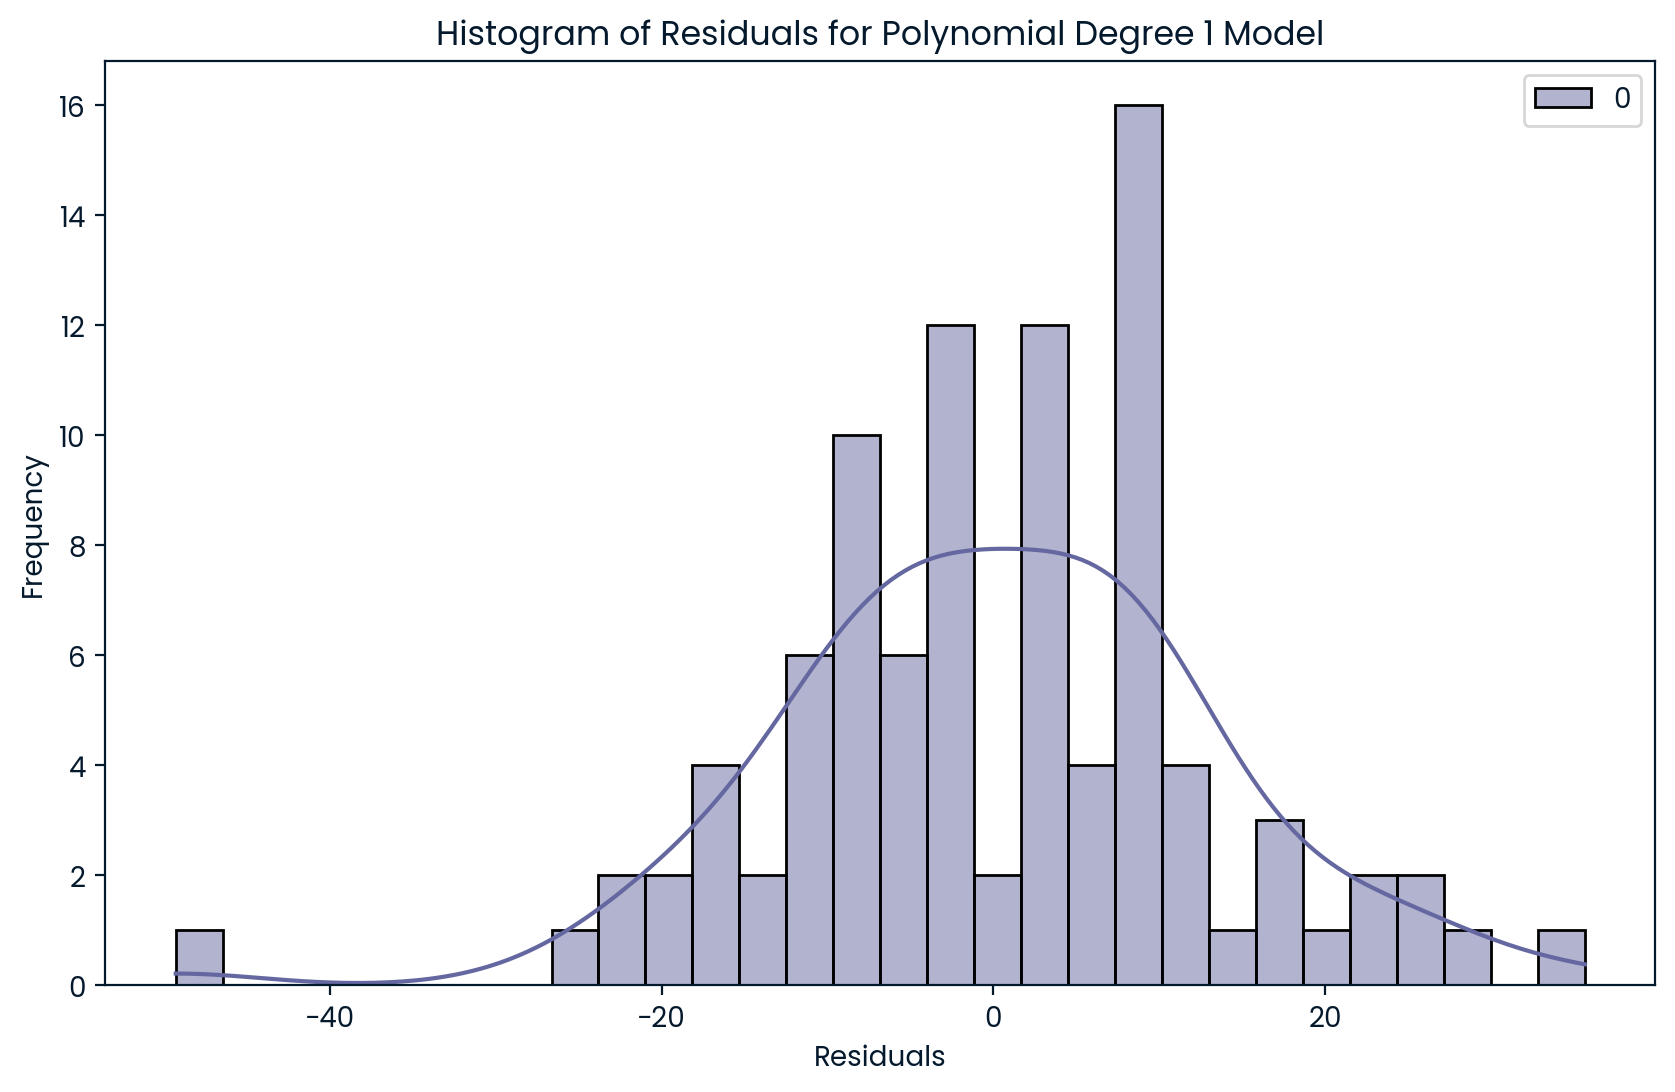

Degrees: 1 MAE: 10.06 R²: 0.77


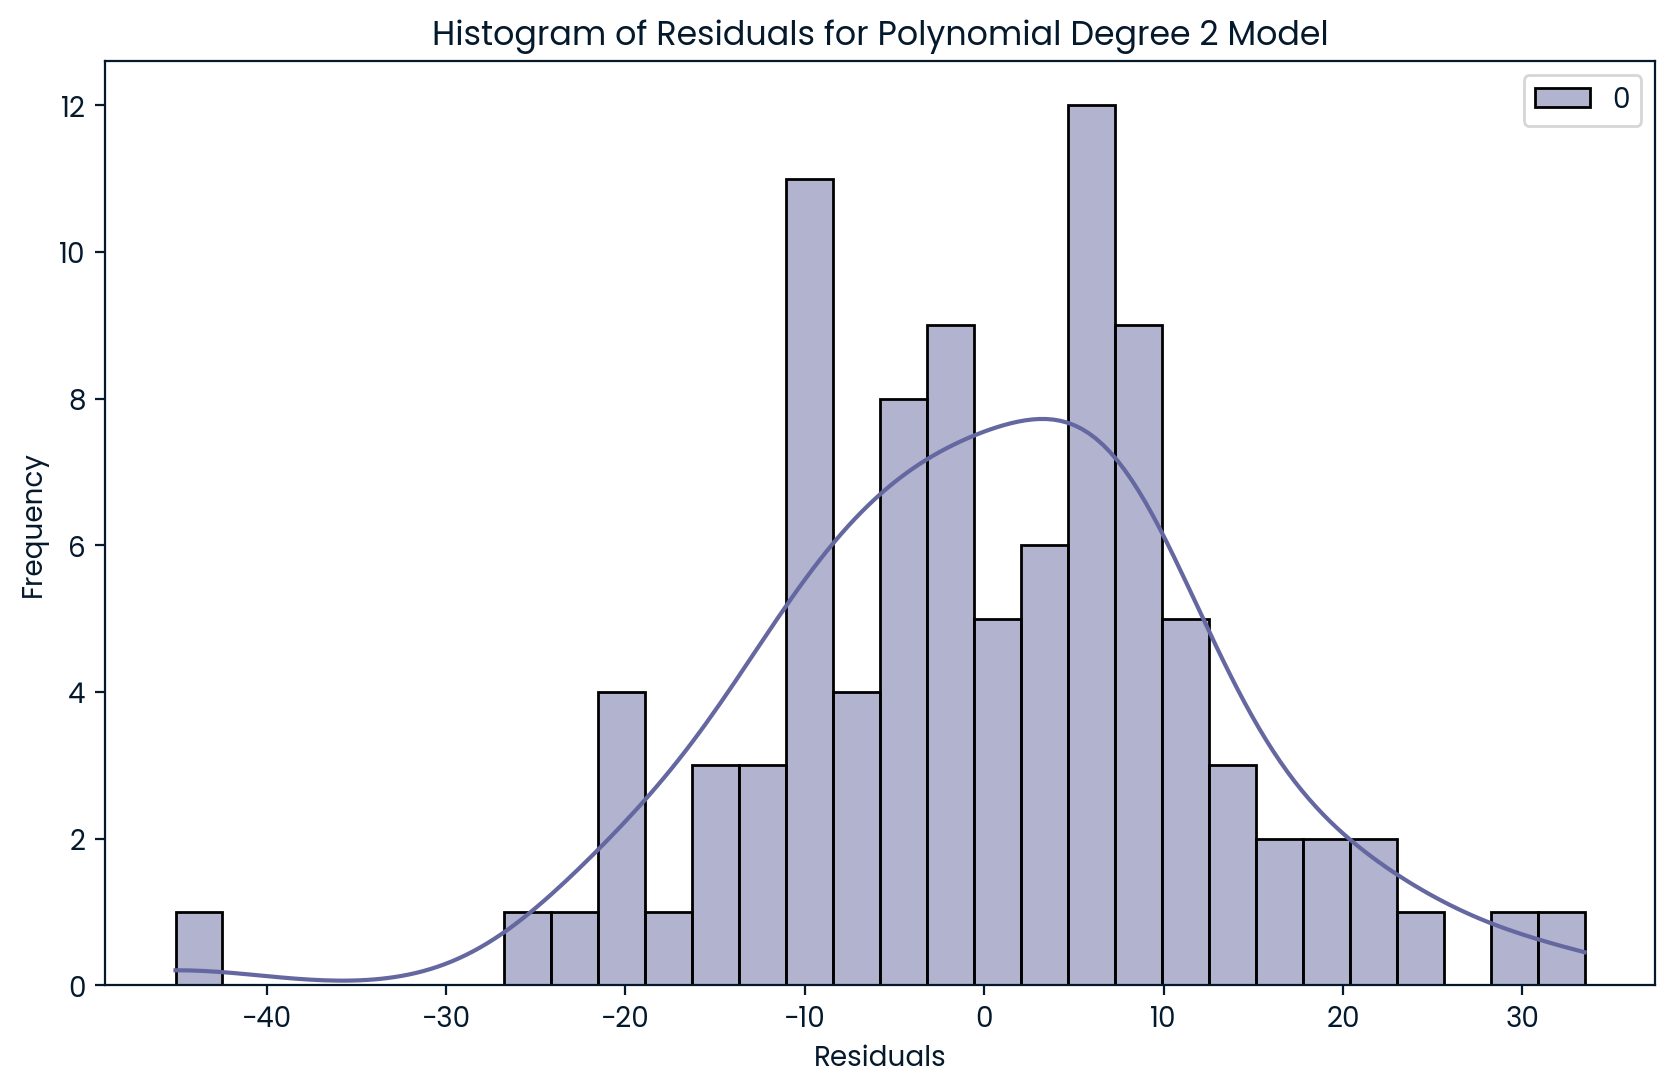

Degrees: 2 MAE: 9.73 R²: 0.78


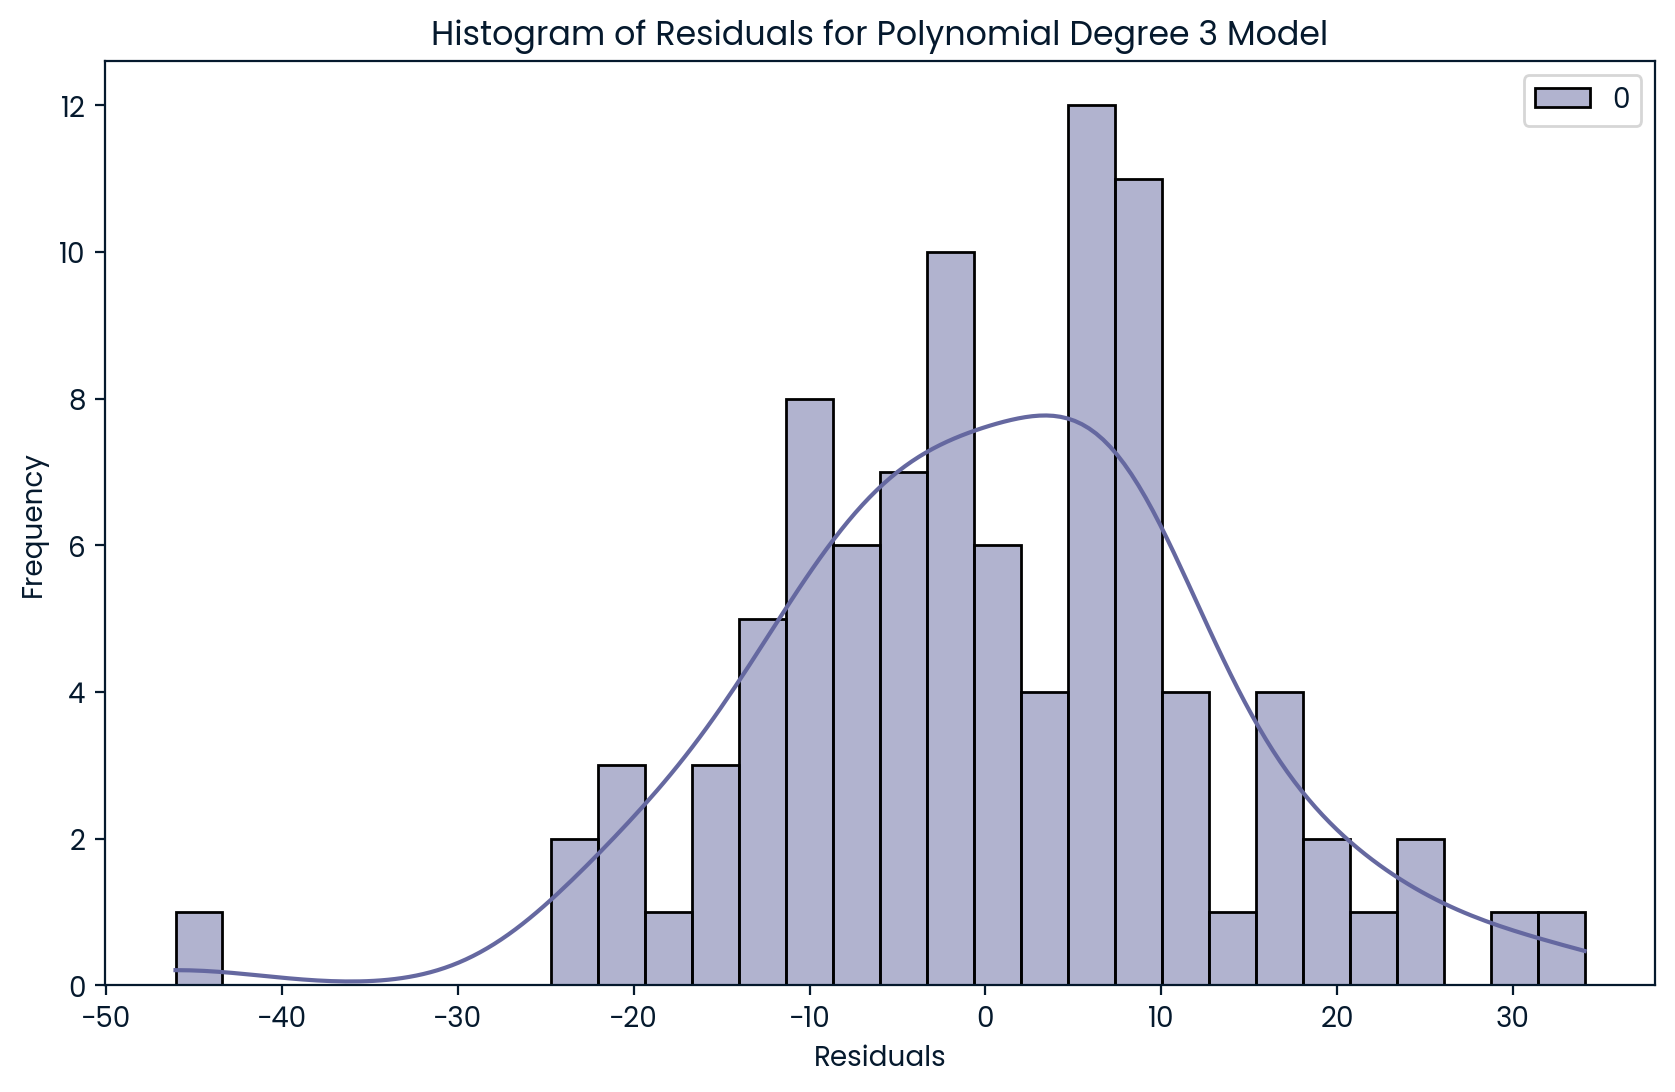

Degrees: 3 MAE: 9.84 R²: 0.78


In [2]:
def gd_namv_overall_prediction_model(num_degrees, plot = False):
    x = data['Normalized_Average_Market_Value'].values.reshape(-1,1)
    y = data['Goal_Difference'].values.reshape(-1,1)

    # Splitting the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

    poly = PolynomialFeatures(degree=num_degrees, include_bias=False)
    poly_features_train = poly.fit_transform(x_train)
    poly_features_test = poly.transform(x_test)

    poly_reg_model = LinearRegression().fit(poly_features_train, y_train)
    predictions = poly_reg_model.predict(poly_features_test)

    # Calculating the performance metrics
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    
    if(plot):
        # Calculating residuals
        residuals = y_test - predictions

        # Plotting the histogram of the residuals
        plt.figure(figsize=(10, 6))
        sns.histplot(residuals, kde=True, bins=30)
        plt.title(f'Histogram of Residuals for Polynomial Degree {num_degrees} Model')
        plt.xlabel('Residuals')
        plt.ylabel('Frequency')
        plt.show()
        
    print("Degrees:", num_degrees, f'MAE: {mae:.2f}', f'R²: {r2:.2f}')
    
    namv = latest_year_df["Normalized_Average_Market_Value"].values.reshape(-1,1)
    namv_poly = poly.transform(namv)  # Transform the input for prediction
    predictions = poly_reg_model.predict(namv_poly).round()
    
    return poly_reg_model, predictions

#create models with various degrees
model1, latest_year_gd_1 = gd_namv_overall_prediction_model(1, True)
model2, latest_year_gd_2 = gd_namv_overall_prediction_model(2, True)
model3, latest_year_gd_3 = gd_namv_overall_prediction_model(3, True)

The model of degree 2 is best when using NAMV to predict GD.

# The Model

In [3]:
# Selecting the features and target variable
features = ['Goal_Difference', 'Normalized_Average_Market_Value']
X = data[features]
y = data['Points']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Creating the model
multi_lin_reg_model = LinearRegression()

# Fitting the model
multi_lin_reg_model.fit(X_train, y_train)

# Making predictions
predictions = multi_lin_reg_model.predict(X_test)

# Calculating the MAE
mae = metrics.mean_absolute_error(y_test, predictions)

# Displaying the metrics
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 3.338742163005391


# Predicting for the Latest Year

In [4]:
latest_year_df["Goal_Difference"] = latest_year_gd_2
latest_year_df

,Team,Points,Year,Normalized_Average_Market_Value,Goal_Difference
380,manchester city,91,2023,1.000000,51.0
381,arsenal fc,89,2023,0.774853,36.0
382,chelsea fc,63,2023,0.535850,17.0
383,liverpool fc,82,2023,0.569969,20.0
384,tottenham hotspur,66,2023,0.517839,15.0
385,manchester united,60,2023,0.486491,12.0
386,aston villa,68,2023,0.414444,5.0
387,newcastle united,60,2023,0.394527,4.0
388,brighton & hove albion,48,2023,0.324039,-3.0
389,west ham united,52,2023,0.336508,-2.0


In [5]:
inputs = ["Goal_Difference", "Normalized_Average_Market_Value"]
predictions = multi_lin_reg_model.predict(latest_year_df[inputs])
latest_year_df["Predicted_Points"] = predictions.round()

latest_year_df.sort_values(by="Predicted_Points", ascending=False, inplace=True)
latest_year_df = latest_year_df[["Year", "Team", "Normalized_Average_Market_Value", "Goal_Difference", "Goal_Difference", "Points", "Predicted_Points"]]
latest_year_df

,Year,Team,Normalized_Average_Market_Value,Goal_Difference,Goal_Difference,Points,Predicted_Points
380,2023,manchester city,1.000000,51.0,51.0,91,86.0
381,2023,arsenal fc,0.774853,36.0,36.0,89,76.0
383,2023,liverpool fc,0.569969,20.0,20.0,82,65.0
382,2023,chelsea fc,0.535850,17.0,17.0,63,63.0
384,2023,tottenham hotspur,0.517839,15.0,15.0,66,62.0
385,2023,manchester united,0.486491,12.0,12.0,60,60.0
386,2023,aston villa,0.414444,5.0,5.0,68,56.0
387,2023,newcastle united,0.394527,4.0,4.0,60,55.0
389,2023,west ham united,0.336508,-2.0,-2.0,52,51.0
388,2023,brighton & hove albion,0.324039,-3.0,-3.0,48,50.0


Error

In [9]:
error = sum(abs(latest_year_df["Predicted_Points"] - latest_year_df["Points"]) / 20 )
print("Mean Absolute Error:", error)

Mean Absolute Error: 6.6
